In [ ]:
import numpy
import scipy.stats
import seaborn

seaborn.set_context('talk')

# Distribución de estadísticos, TCL

## Generación de datos

1. Generamos 1 realización de una muestra aleatoria $X_1,  ... X_n$ (de tamaño n)

$X_1,  ... X_n$ (i.i.d) con cada $X_i$ con distribución conocida (mejor no normal). Por ejemplo: Poisson. Graficar la distribución de la muestra.

2. Luego tenemos 1 realización del estadístico $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$.



promedio de la muestra= 5.108 , una realización del estadístico media muestral


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


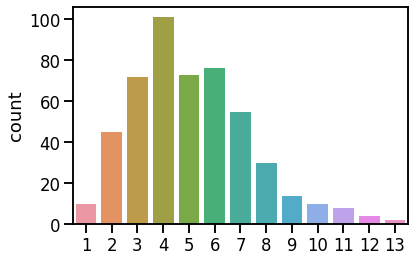

In [ ]:
# Generación de muestras de una distribución oisson

n = 500 

lambd = 5 

sample = scipy.stats.poisson.rvs(lambd, size=n) #realización de una muestra aleatoria X_1,  ... X_n (de tamaño n)

seaborn.countplot(sample)
#seaborn.histplot(sample, bins=12)
print ('promedio de la muestra=', sample.mean(), ', una realización del estadístico media muestral')


1. Generamos m realizaciones de una muestra aleatoria $X_1,  ... X_n$ (de tamaño n)

$X_1,  ... X_n$ (i.i.d) con cada $X_i$ con distribución no normal. Por ejemplo: Poisson. Elegir una realización y graficar la distribución de la muestra.

2. Luego tendríamos N realizaciones del estadístico $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$.

Graficar la distribución de estas realizaciones (de las medias muestrales). ¿Se parece a una distribución normal?

In [ ]:
# Generación de muestras de una distribución poisson

m = 400 #m filas, m realizaciones de una muestra aleatoria X_1,  ... X_n (tamaño n)
n = 1500 

lambd = 5 

samples = scipy.stats.poisson.rvs(lambd, size=(m, n))

In [ ]:
# Generación de muestras de una distribución exponencial
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
l = 5
s = 2
# media=l+s
# varianza=s^2
m = 100 #m filas, m realizaciones de una muestra aleatoria X_1,  ... X_n (tamaño n)
n = 2000 
samples = scipy.stats.expon.rvs(loc=l,scale=s,size=(m, n))

[5.0369946  8.91530417 5.46797069 7.85012991] ... [6.52046938 7.16901261 6.07749149 5.31314288]
media=  6.9933413980689165


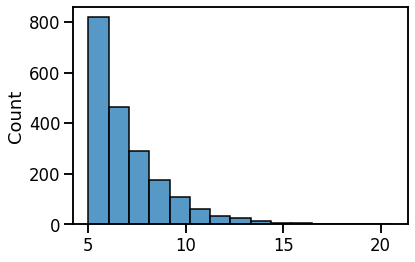

In [ ]:
#primera realización de la m.a.
print(samples[0][:4],'...', samples[0][-5:-1])

# Histograma de la i-ésima realización de la muestra
i=9
#seaborn.countplot(samples[i])
seaborn.histplot(samples[i], bins=15)
print('media= ', samples[i].mean())

In [ ]:
alpha = 0.05
z_0975 = 1.96
media=samples[i].mean()
std=samples[i].std()
estadistico_liminf =media-(std*z_0975/numpy.sqrt(n))
estadistico_limsup =media+(std*z_0975/numpy.sqrt(n))
print(estadistico_liminf,estadistico_limsup)
print(estadistico_limsup-estadistico_liminf)

6.90576403916102 7.080918756976813
0.1751547178157935


In [ ]:
# Calculamos la media para cada una de las muestras. 
sample_means = samples.mean(axis=1) #media de cada fila, tendremos m medias
sample_means.shape

(100,)

Veamos la distribución de las m realizaciones del estadístico $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$ 

Media de medias = 6.993777092627601
Varianza de medias = 0.004162412405914776


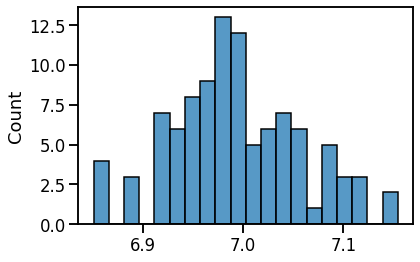

In [ ]:
seaborn.histplot(sample_means, bins=20)
print('Media de medias =', sample_means. mean())
print('Varianza de medias =', sample_means. var())

In [ ]:
# documentación de la función norm de scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# Estima la media y el desvío (los parámetros de una normal)  
media, std = scipy.stats.norm.fit(sample_means)
media, std, std**2

(5.0014225, 0.07430998582794913, 0.005521973993750001)

## Ejercicio 1 (para realizar en clase 3)

1. Analizar qué pasa cuando crece $n$ y ver la distribución de $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$ cuando $n\rightarrow \infty$ (el tamaño de la muestra). ¿Qué sucede con la varianza?

2. Realizar el mismo análisis con otra distribución no normal, por ejemplo, exponencial.

#Estimación puntual y por intervalos (Opcional)


## Ejercicio 2: Estimadores puntuales y por intervalos (para practicar luego)
0. Fijar n=700
1. Dar un estimador puntual de la media de la distribución generada

2. Dar un intervalo de confianza (IC) para la media de nivel asintótico 0.95=(1-alpha), calcular la longitud del intervalo.
3. Dar m=1000 realizaciones del **intervalo de confianza** para **la media** de nivel 0.95 y contar cuantos contienen a **la media** verdadera. 
4. Incrementar n=4000 (por 4) y repetir el paso 2. Qué le pasó a la longitud el IC ?
